In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data and also giving column names for the data without affecting the row 0 data. 
header =["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
data = pd.read_csv('Downloads/auto.csv', names = header)

In [3]:
#data contains values thats not desired in columns 
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
#few columns are not assigned with correct datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
#replacing all ? values in each column with NAN
df = data.replace('?', np.nan)

In [6]:
#having a check if all columns have replaced the ? value to NAN.
leng = len(header)
for i in range(leng):
    print(header[i], df[header[i]].unique())
    print('\n')

symboling [ 3  1  2  0 -1 -2]


normalized-losses [nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']


make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


fuel-type ['gas' 'diesel']


aspiration ['std' 'turbo']


num-of-doors ['two' 'four' nan]


body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


drive-wheels ['rwd' 'fwd' '4wd']


engine-location ['front' 'rear']


wheel-base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.

In [7]:
#counting the columns with null values 
missing_data = df.isnull().sum()
missing_data.sort_values(inplace=True, ascending=False)
missing_data.head()

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
dtype: int64

In [8]:
#calculating mean for the columns with null value. 
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses: ", avg_norm_loss)

avg_bore = df['bore'].astype('float').mean(axis=0)
print("Average of bore: ", avg_bore)

avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average of normalized-losses:  122.0
Average of bore:  3.3297512437810957
Average of stroke: 3.2554228855721337
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079


In [9]:
#replacing the nan value with each column mean
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [10]:
#checking the replacement was successful. As we can see column num-of-doors and price has NAN value 
leng = len(header)
for i in range(leng):
    print(header[i], df[header[i]].unique())
    print('\n')

symboling [ 3  1  2  0 -1 -2]


normalized-losses [122.0 '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145'
 '137' '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93'
 '142' '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119'
 '154' '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90'
 '94' '256' '95']


make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


fuel-type ['gas' 'diesel']


aspiration ['std' 'turbo']


num-of-doors ['two' 'four' nan]


body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


drive-wheels ['rwd' 'fwd' '4wd']


engine-location ['front' 'rear']


wheel-base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

In [11]:
#since the num-of-doors has categorical data mean is not possible. hence checking for the most common value and assiging that
#value to the NAN value 
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [12]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [13]:
#droping rows with no price info
df.dropna(subset=["price"], axis=0, inplace=True)

In [14]:
# reset index, because we droped rows
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [16]:
#assigning the correct datatypes for the columns
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["horsepower"]] = df[["horsepower"]].astype("int")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [17]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [18]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


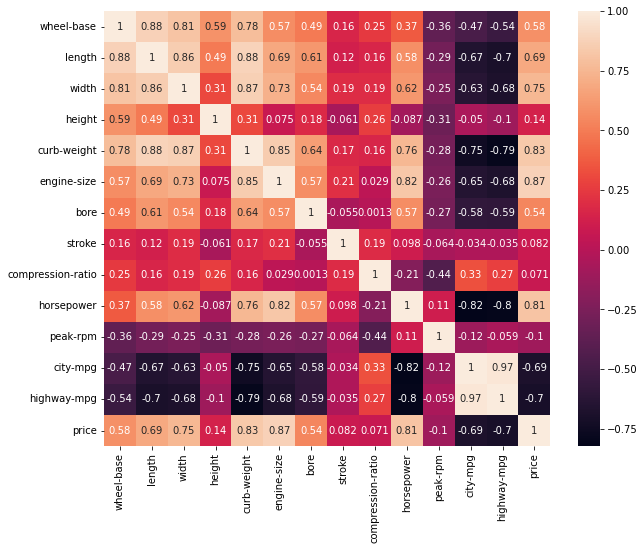

In [19]:
df1 = df[['wheel-base','length','width','height','curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
          'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

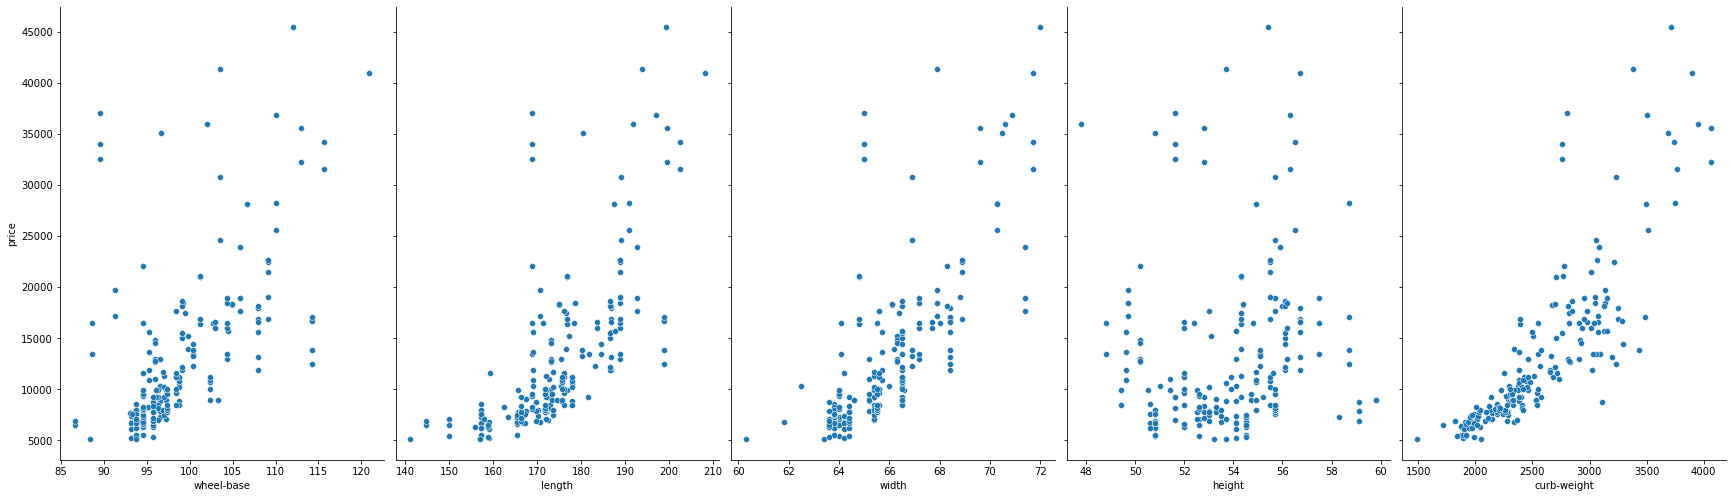

In [20]:
#graphical showcasing the relationship between price and 'wheel-base','length','width','height','curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
 #'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'
sns.pairplot(df, x_vars=['wheel-base','length','width','height',
                           'curb-weight'], y_vars='price',height=7, aspect=0.7, kind='scatter')

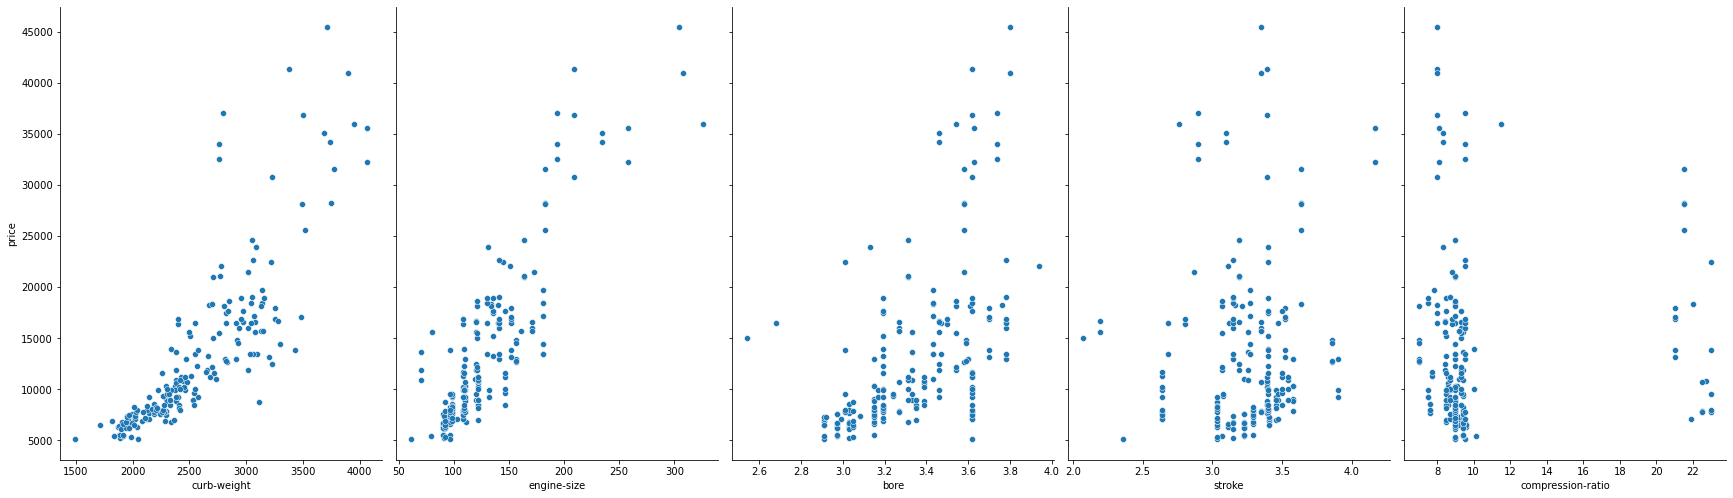

In [21]:
sns.pairplot(df, x_vars=['curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio'], y_vars='price',height=7, 
             aspect=0.7, kind='scatter')

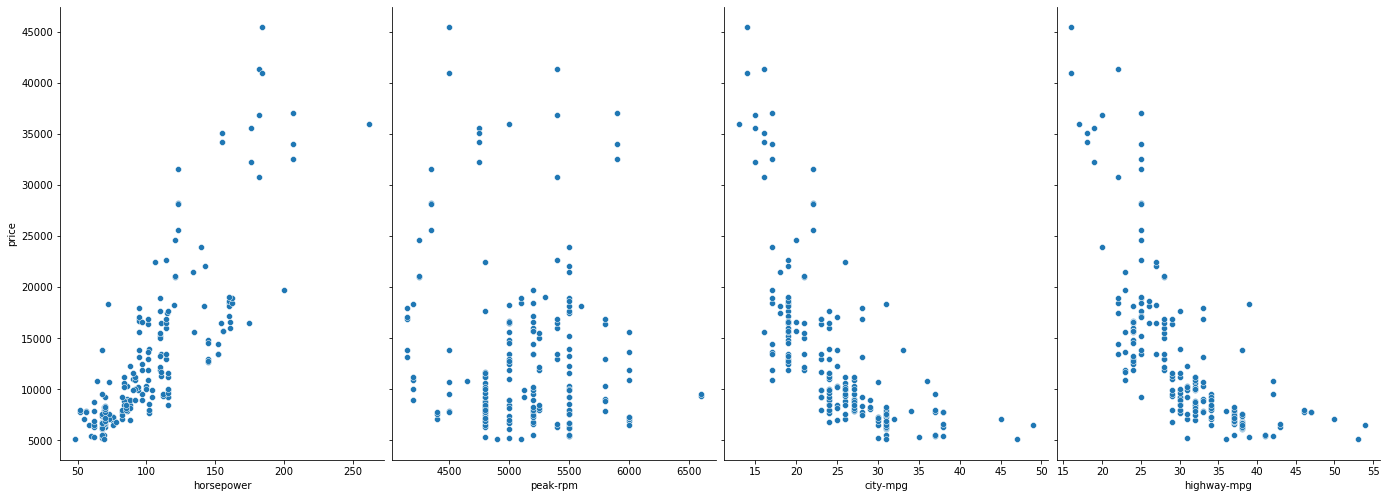

In [22]:
sns.pairplot(df, x_vars=['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], y_vars='price',height=7, 
             aspect=0.7, kind='scatter')

<AxesSubplot:xlabel='body-style', ylabel='price'>

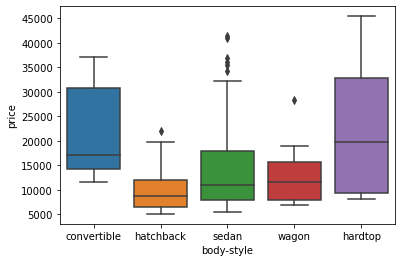

In [23]:
sns.boxplot(x='body-style',y='price',data=df)

<AxesSubplot:xlabel='fuel-type', ylabel='price'>

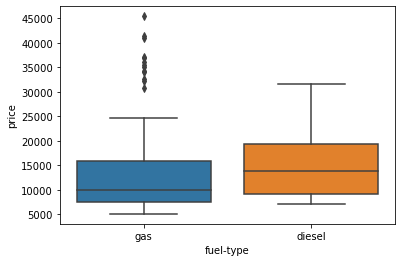

In [24]:
sns.boxplot(x='fuel-type',y='price',data=df)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

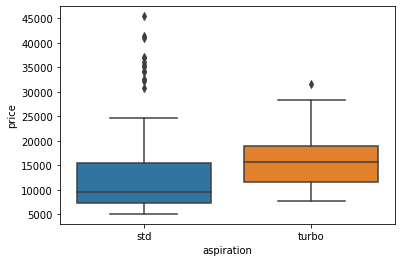

In [25]:
sns.boxplot(x='aspiration',y='price',data=df)

<AxesSubplot:xlabel='engine-size', ylabel='price'>

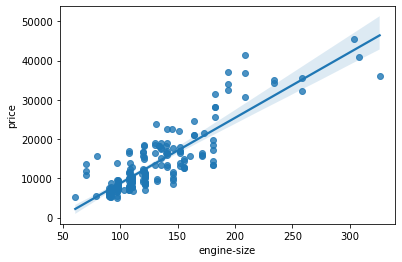

In [26]:
#engine size increase shows price increase
sns.regplot(x='engine-size',y='price',data=df1)

<AxesSubplot:xlabel='horsepower', ylabel='price'>

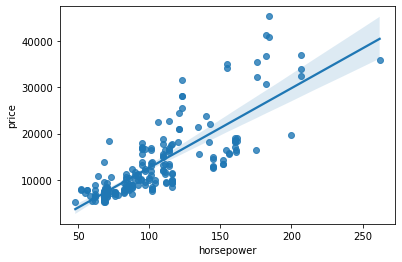

In [27]:
#increasing horsepower increases price
sns.regplot(x='horsepower',y='price',data=df1)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

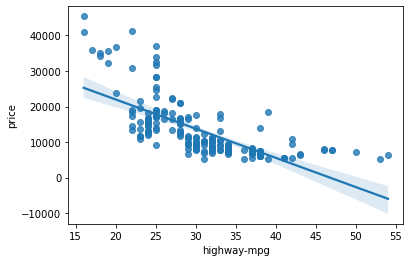

In [28]:
# highway mileage decreases as the price goes up
sns.regplot(x='highway-mpg',y='price',data=df1)

<AxesSubplot:xlabel='highway-mpg', ylabel='horsepower'>

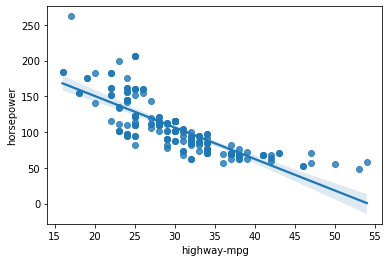

In [29]:
# highway mileage decreases for higher horsepower cars
sns.regplot(x='highway-mpg',y='horsepower',data=df1)

In [30]:
#checking unique body make of cars in the data provided 
y = []
y_df = data[["body-style"]] 
y_df.value_counts()

body-style 
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
dtype: int64

In [31]:
#assigning values to each car body type
#0 -- sedan 
#1 --hatchback
#2 -- wagon 
#3 -- hardtop
#4 -- convertible
y = []
for i in range(y_df.shape[0]):
    if y_df["body-style"].values[i] == 'sedan':
        y.append(0)
    elif y_df["body-style"].values[i] == 'hatchback':
        y.append(1)
    elif y_df["body-style"].values[i] == 'wagon':
        y.append(2)
    elif y_df["body-style"].values[i] == 'hardtop':
        y.append(3)
    else:
        y.append(4)
print(y)

[4, 4, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 3, 0, 0, 4, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 3, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 3, 3, 4, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 3, 3, 1, 3, 1, 4, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0]


In [32]:
y1 = []
for i in range(0,201):
    y1.append(y[i])

print(y1)

[4, 4, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 3, 0, 0, 4, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 3, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 3, 3, 4, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 3, 3, 1, 3, 1, 4, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0]


In [33]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()

In [34]:
df1 = df[['wheel-base','length','width','height','curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
          'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]
#df1['make1']=y1
X = pd.DataFrame(pre_process.fit_transform(df1))

In [35]:
#performing PCA to reduce the components 
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.53099661 0.16670902 0.08503808 0.06328151 0.04390588 0.03146002
 0.02539071 0.01997892 0.008946   0.00837849 0.0060289  0.00483914
 0.00366772 0.00137901]


In [36]:
X_new1 = pd.DataFrame(X_new)
X_new1.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.618118,-2.095197,0.446468,2.417517,0.154559,-0.255927,-0.795304,-0.681041,0.142370,-0.158934,0.402230,-0.445882,0.155792,0.023607
1,-0.496764,-2.120523,0.400520,2.470737,0.291474,-0.177255,-0.690922,-0.654047,-0.076303,-0.243235,0.565111,-0.387509,0.191563,0.049717
2,0.434846,-1.315955,-1.428950,-0.500053,0.528189,1.939341,-0.504938,-1.591952,0.450895,0.267854,0.015347,0.389712,0.070899,-0.133969
3,-0.175697,-0.229669,-0.105087,-1.117223,0.333751,-0.133125,-0.067936,0.015766,-0.173075,0.024980,0.246661,0.180083,-0.284177,0.032061
4,1.272128,-1.151839,-0.053723,-1.163669,0.143065,0.276550,-0.201450,-0.708189,-0.362182,-0.143017,-0.031017,-0.237910,0.093260,0.074662


Text(0, 0.5, 'cumulative explained variance')

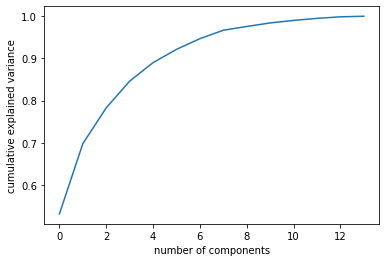

In [37]:
#checking for optimum number of components needed after PCA
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [38]:
X_new2 = X_new1[[0,1,2,3,4,5,6,7]] # taking first 3 features as input according to above plot the first 7 features contains more than 90%
                        # of input data

In [39]:
#splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new2, y1, test_size = 0.20, random_state = 1)

In [40]:
#performing logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [41]:
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
model.score(X_train, y_train)

0.5

In [43]:
model.score(X_test,y_test)

0.36585365853658536

In [44]:
#performing SVM
from sklearn import svm
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_new2, y1)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
print("Accuracy for linear SVM kernal: ", svc.score(X_test, y_test))
print("Accuracy for Radial Basis Function SVM kernal: ", rbf_svc.score(X_test, y_test))
print("Accuracy for polynomial SVM kernal: ", poly_svc.score(X_test, y_test))
print("Accuracy forLinear SVC: ", lin_svc.score(X_test, y_test))

Accuracy for linear SVM kernal:  0.5121951219512195
Accuracy for Radial Basis Function SVM kernal:  0.4146341463414634
Accuracy for polynomial SVM kernal:  0.43902439024390244
Accuracy forLinear SVC:  0.36585365853658536


C:\Users\aashi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [45]:
#performing KNN
from sklearn.neighbors import KNeighborsClassifier 
kn=KNeighborsClassifier(n_neighbors=40)
kn.fit(X_train,y_train)
kn.score(X_test,y_test)

0.5365853658536586

In [46]:
#performing Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

-0.05826451917607445

In [73]:
#performing Kmeans clustering 

#weight vs make 
X12 = df1[['curb-weight']]
X12['make'] = y1
X12 = X12.iloc[:, [0, 1]].values

In [74]:
print(X12)

[[2548    4]
 [2548    4]
 [2823    1]
 [2337    0]
 [2824    0]
 [2507    0]
 [2844    0]
 [2954    2]
 [3086    0]
 [2395    1]
 [2395    0]
 [2710    0]
 [2765    0]
 [3055    0]
 [3230    0]
 [3380    0]
 [3505    0]
 [1488    0]
 [1874    1]
 [1909    1]
 [1876    0]
 [1876    1]
 [2128    1]
 [1967    1]
 [1989    1]
 [1989    0]
 [2191    0]
 [2535    0]
 [2811    2]
 [1713    1]
 [1819    1]
 [1837    1]
 [1940    1]
 [1956    1]
 [2010    1]
 [2024    0]
 [2236    2]
 [2289    1]
 [2304    1]
 [2372    0]
 [2465    0]
 [2293    0]
 [2337    0]
 [2734    0]
 [4066    0]
 [4066    0]
 [3950    1]
 [1890    0]
 [1900    0]
 [1905    0]
 [1945    1]
 [1950    1]
 [2380    1]
 [2380    0]
 [2385    0]
 [2500    1]
 [2385    1]
 [2410    1]
 [2385    1]
 [2410    1]
 [2443    0]
 [2425    1]
 [2670    0]
 [2700    0]
 [3515    1]
 [3750    0]
 [3495    0]
 [3770    0]
 [3740    2]
 [3685    3]
 [3900    0]
 [3715    0]
 [2910    4]
 [1918    0]
 [1944    3]
 [2004    1]
 [2145    1]

In [75]:
from sklearn.cluster import KMeans
wcss=[]
#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X12)
    wcss.append(kmeans.inertia_)
#inertia_ is the formula used to segregate the data points into clusters
import warnings
warnings.filterwarnings('ignore')

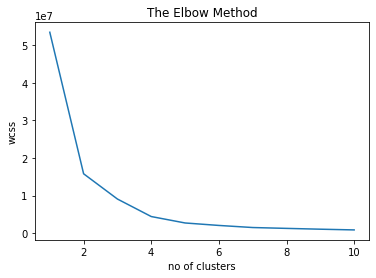

In [76]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [77]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X12)

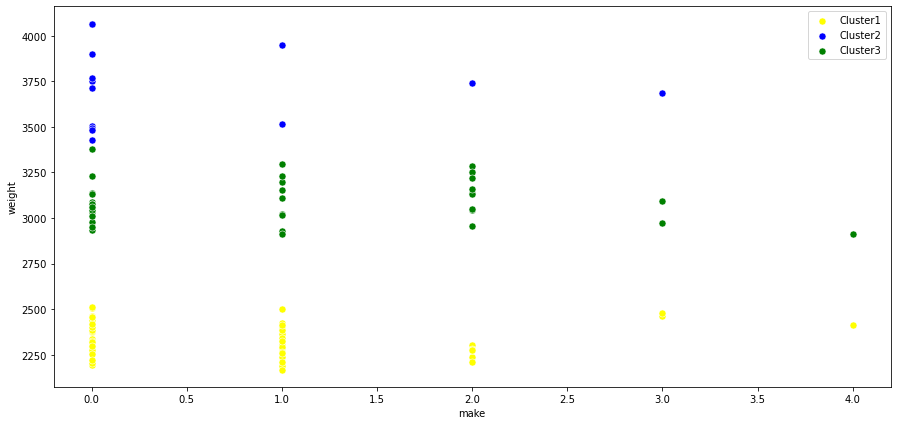

In [83]:
plt.figure(figsize=(15,7))
sns.scatterplot(X12[y_kmeans == 0, 1],X12[y_kmeans == 0, 0], color = 'yellow', label = 'Cluster1',s=50)
sns.scatterplot( X12[y_kmeans == 1, 1],X12[y_kmeans == 1, 0], color = 'blue', label = 'Cluster2',s=50)
sns.scatterplot( X12[y_kmeans == 2, 1],X12[y_kmeans == 2, 0], color = 'green', label = 'Cluster3',s=50)
plt.xlabel("make")
plt.ylabel("weight")
plt.show()
plt.show()
#the points that from a right line above x axis 
#0 -- sedan 
#1 --hatchback
#2 -- wagon 
#3 -- hardtop
#4 -- convertible



In [84]:
#lenght vs make
X12 = df1[['length']]
X12['make'] = y1
X12 = X12.iloc[:, [0, 1]].values

In [85]:
print(X12)

[[168.8   4. ]
 [168.8   4. ]
 [171.2   1. ]
 [176.6   0. ]
 [176.6   0. ]
 [177.3   0. ]
 [192.7   0. ]
 [192.7   2. ]
 [192.7   0. ]
 [176.8   1. ]
 [176.8   0. ]
 [176.8   0. ]
 [176.8   0. ]
 [189.    0. ]
 [189.    0. ]
 [193.8   0. ]
 [197.    0. ]
 [141.1   0. ]
 [155.9   1. ]
 [158.8   1. ]
 [157.3   0. ]
 [157.3   1. ]
 [157.3   1. ]
 [157.3   1. ]
 [157.3   1. ]
 [157.3   0. ]
 [157.3   0. ]
 [174.6   0. ]
 [173.2   2. ]
 [144.6   1. ]
 [144.6   1. ]
 [150.    1. ]
 [150.    1. ]
 [150.    1. ]
 [163.4   1. ]
 [157.1   0. ]
 [167.5   2. ]
 [167.5   1. ]
 [175.4   1. ]
 [175.4   0. ]
 [175.4   0. ]
 [169.1   0. ]
 [170.7   0. ]
 [172.6   0. ]
 [199.6   0. ]
 [199.6   0. ]
 [191.7   1. ]
 [159.1   0. ]
 [159.1   0. ]
 [159.1   0. ]
 [166.8   1. ]
 [166.8   1. ]
 [169.    1. ]
 [169.    0. ]
 [169.    0. ]
 [169.    1. ]
 [177.8   1. ]
 [177.8   1. ]
 [177.8   1. ]
 [177.8   1. ]
 [177.8   0. ]
 [177.8   1. ]
 [175.    0. ]
 [175.    0. ]
 [190.9   1. ]
 [190.9   0. ]
 [187.5   

In [86]:
from sklearn.cluster import KMeans
wcss=[]
#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X12)
    wcss.append(kmeans.inertia_)
#inertia_ is the formula used to segregate the data points into clusters
import warnings
warnings.filterwarnings('ignore')

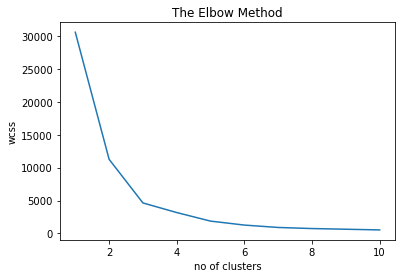

In [87]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [88]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X12)

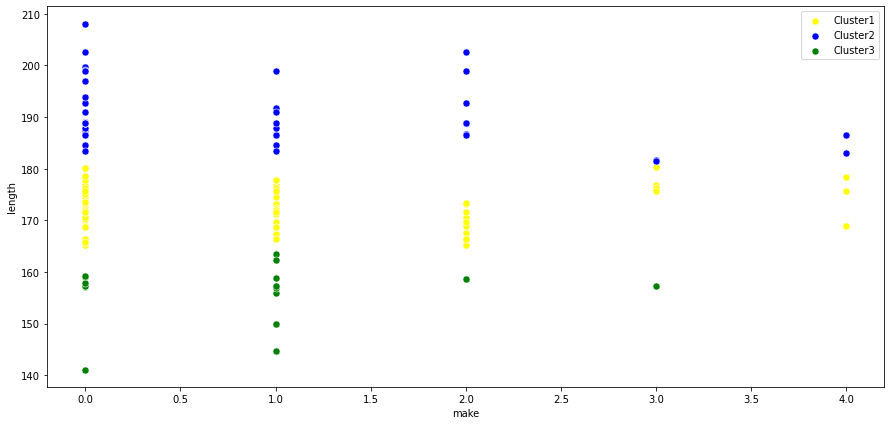

In [89]:
plt.figure(figsize=(15,7))
sns.scatterplot(X12[y_kmeans == 0, 1],X12[y_kmeans == 0, 0], color = 'yellow', label = 'Cluster1',s=50)
sns.scatterplot( X12[y_kmeans == 1, 1],X12[y_kmeans == 1, 0], color = 'blue', label = 'Cluster2',s=50)
sns.scatterplot( X12[y_kmeans == 2, 1],X12[y_kmeans == 2, 0], color = 'green', label = 'Cluster3',s=50)
plt.xlabel("make")
plt.ylabel("length")
plt.show()
plt.show()
#the points that from a right line above x axis 
#0 -- sedan 
#1 --hatchback
#2 -- wagon 
#3 -- hardtop
#4 -- convertible